### Visualization of jobs_in_data.csv with seaborn

### About Dataset

Data analysis will be focused on companies and full-time employees located in US for year 2023.

**job_title**: The specific title of the job role, like 'Data Scientist', 'Data Engineer', or 'Data Analyst'. This column is crucial for understanding the salary distribution across various specialized roles within the data field.

**job_category**: A classification of the job role into broader categories for easier analysis. This might include areas like 'Data Analysis', 'Machine Learning', 'Data Engineering', etc.

**US_salary_2023**: The annual gross salary of the role in United States Dollars (USD). 

**experience_level**: Classifies the professional experience level of the employee. Common categories might include 'Entry-level', 'Mid-level', 'Senior', and 'Executive', providing insight into how experience influences salary in data-related roles.

**employment_type**: Specifies the type of employment, such as 'Full-time', 'Part-time', 'Contract', etc. This helps in analyzing how different employment arrangements affect salary structures.

**work_setting**: The work setting or environment, like 'Remote', 'In-person', or 'Hybrid'. This column reflects the impact of work settings on salary levels in the data industry.

**company_size**: The size of the employer company, often categorized into small (S), medium (M), and large (L) sizes. This allows for analysis of how company size influences salary.

Source: https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the CSV file into a Pandas DataFrame
jobs_in_data_us = pd.read_csv("output_data\jobs_in_data_ready_for_analysis.csv")
# Count number of rows and columns
jobs_in_data_us.shape

(6635, 6)

In [3]:
# Take a look at data
jobs_in_data_us.head()

,job_title,job_category,US_salary_2023,experience_level,work_setting,company_size
0,Data Architect,Data Architecture and Modeling,186000,Senior,In-person,M
1,Data Architect,Data Architecture and Modeling,81800,Senior,In-person,M
2,Data Scientist,Data Science and Research,212000,Senior,In-person,M
3,Data Scientist,Data Science and Research,93300,Senior,In-person,M
4,Data Scientist,Data Science and Research,130000,Senior,Remote,M


### Job Category Exploration

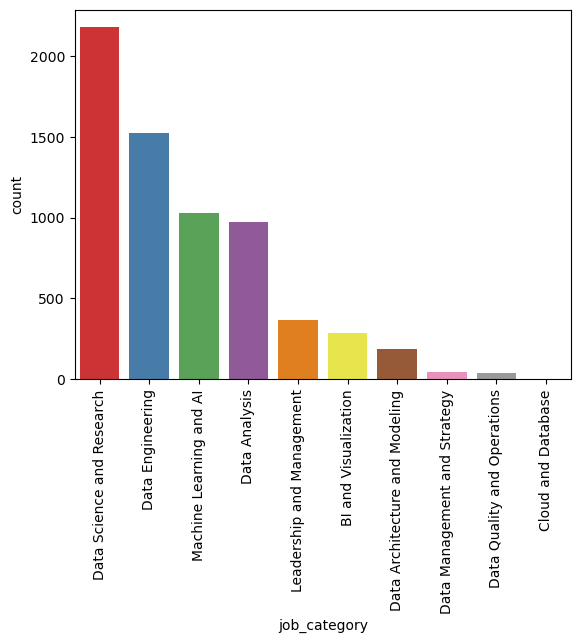

In [4]:
# Plot the number of rows per job_category
sns.countplot(x=jobs_in_data_us['job_category'], order=jobs_in_data_us['job_category'].value_counts().index, palette = "Set1")
plt.xticks(rotation=90)
plt.show()

In [5]:
# Find unique job titles per category
job_title_per_category = jobs_in_data_us.groupby(['job_category'])['job_title'].unique()
job_title_per_category

job_category
BI and Visualization              [BI Developer, Business Intelligence Engineer,...
Cloud and Database                                        [Cloud Database Engineer]
Data Analysis                     [Data Analyst, Financial Data Analyst, Busines...
Data Architecture and Modeling    [Data Architect, Data Modeler, Data Strategist...
Data Engineering                  [Data Engineer, Data Integration Engineer, ETL...
Data Management and Strategy      [Data Management Analyst, Data Specialist, Dat...
Data Quality and Operations       [Data Quality Engineer, Data Quality Analyst, ...
Data Science and Research         [Data Scientist, Applied Scientist, Research S...
Leadership and Management         [Analytics Engineer, Data Product Manager, Dat...
Machine Learning and AI           [Machine Learning Researcher, Machine Learning...
Name: job_title, dtype: object

In [6]:
# Find unique job titles per category
job_categoris = list(jobs_in_data_us['job_category'].drop_duplicates().sort_values())
job_categoris

['BI and Visualization',
 'Cloud and Database',
 'Data Analysis',
 'Data Architecture and Modeling',
 'Data Engineering',
 'Data Management and Strategy',
 'Data Quality and Operations',
 'Data Science and Research',
 'Leadership and Management',
 'Machine Learning and AI']

In [7]:
# Create a summary of unique job titles per job category
for i in range(0,10):
    print(job_categoris[i])
    print(job_title_per_category[i])

BI and Visualization
['BI Developer' 'Business Intelligence Engineer'
 'Business Intelligence Analyst' 'BI Analyst'
 'Business Intelligence Manager' 'Business Intelligence Developer'
 'Business Intelligence Specialist' 'Data Visualization Specialist'
 'Data Visualization Engineer' 'Data Visualization Analyst']
Cloud and Database
['Cloud Database Engineer']
Data Analysis
['Data Analyst' 'Financial Data Analyst' 'Business Data Analyst'
 'Compliance Data Analyst' 'Business Intelligence Data Analyst'
 'Lead Data Analyst']
Data Architecture and Modeling
['Data Architect' 'Data Modeler' 'Data Strategist' 'AWS Data Architect']
Data Engineering
['Data Engineer' 'Data Integration Engineer' 'ETL Developer'
 'Data Infrastructure Engineer' 'Software Data Engineer'
 'BI Data Engineer']
Data Management and Strategy
['Data Management Analyst' 'Data Specialist' 'Data Integration Specialist'
 'Data Management Specialist' 'Data Strategy Manager']
Data Quality and Operations
['Data Quality Engineer' 'Dat

### Plot company_size and experince_level vs job_category

In [8]:
# Agregate data 
jobs_in_data_us.groupby(['company_size', 'job_category','experience_level'])['US_salary_2023'].mean()

company_size  job_category                    experience_level
L             BI and Visualization            Mid-level           124000.000000
                                              Senior              141695.454545
              Cloud and Database              Senior              170000.000000
              Data Analysis                   Entry-level          67066.666667
                                              Mid-level            99000.000000
                                              Senior              143662.500000
              Data Architecture and Modeling  Mid-level           258000.000000
                                              Senior              161725.000000
              Data Engineering                Mid-level           110802.000000
                                              Senior              166906.896552
              Data Science and Research       Entry-level         165517.500000
                                              Executive  

In [9]:
# Create sorted df
jobs_in_data_us_sorted = jobs_in_data_us.copy()
# sort by experience level
experience_level_categories = ["Entry-level", "Mid-level", "Senior", "Executive"]
jobs_in_data_us_sorted["experience_level"] = pd.Categorical(jobs_in_data_us_sorted["experience_level"], categories = experience_level_categories, ordered=True)
jobs_in_data_us_sorted = jobs_in_data_us.sort_values(by = ['company_size','job_category', 'experience_level'])
jobs_in_data_us_sorted.head(80)

,job_title,job_category,US_salary_2023,experience_level,work_setting,company_size
32,Business Intelligence Engineer,BI and Visualization,185000,Mid-level,In-person,L
33,Business Intelligence Engineer,BI and Visualization,79600,Mid-level,In-person,L
202,Business Intelligence Engineer,BI and Visualization,185000,Mid-level,In-person,L
203,Business Intelligence Engineer,BI and Visualization,79600,Mid-level,In-person,L
689,Business Intelligence Engineer,BI and Visualization,165600,Mid-level,In-person,L
...,...,...,...,...,...,...
901,Data Analyst,Data Analysis,86500,Entry-level,In-person,L
902,Data Analyst,Data Analysis,40400,Entry-level,In-person,L
1233,Financial Data Analyst,Data Analysis,56500,Entry-level,Hybrid,L
4235,Compliance Data Analyst,Data Analysis,60000,Entry-level,Remote,L


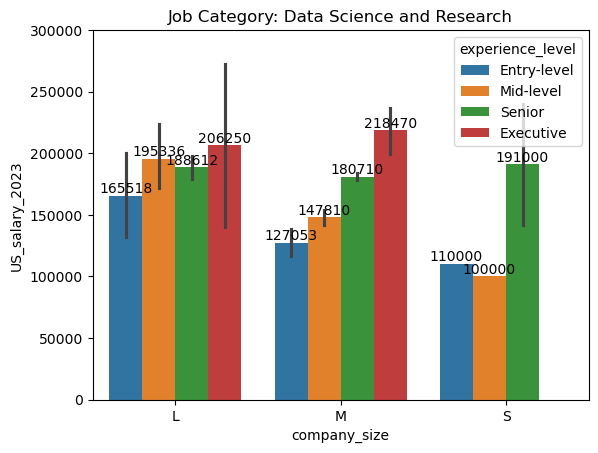

In [10]:
# Plot company_size experince_level vs job_category
ax = sns.barplot(data = jobs_in_data_us_sorted.loc[jobs_in_data_us_sorted['job_category'] == 'Data Science and Research'], 
x='company_size', y='US_salary_2023', hue='experience_level', hue_order=experience_level_categories )
# add values to the bars
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.set_ylim(0, 300000)
ax.set(title = "Job Category: Data Science and Research")
plt.show()

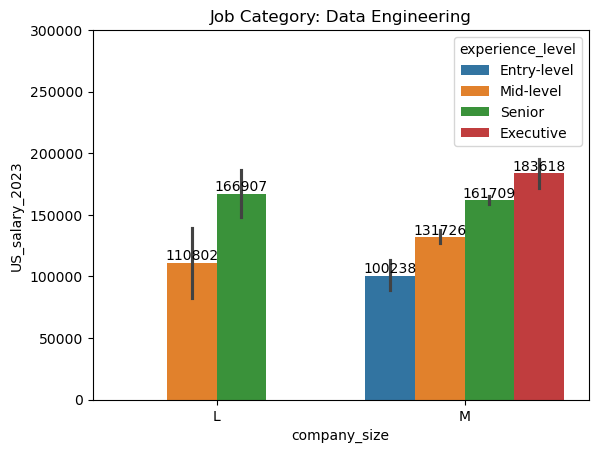

In [11]:
# Plot company_size experince_level vs salary per job_category
ax = sns.barplot(data = jobs_in_data_us_sorted.loc[jobs_in_data_us_sorted['job_category'] == 'Data Engineering'], 
x='company_size', y='US_salary_2023', hue='experience_level', hue_order=experience_level_categories )
# add values to the bars
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.set_ylim(0, 300000)
ax.set(title = "Job Category: Data Engineering")
plt.show()

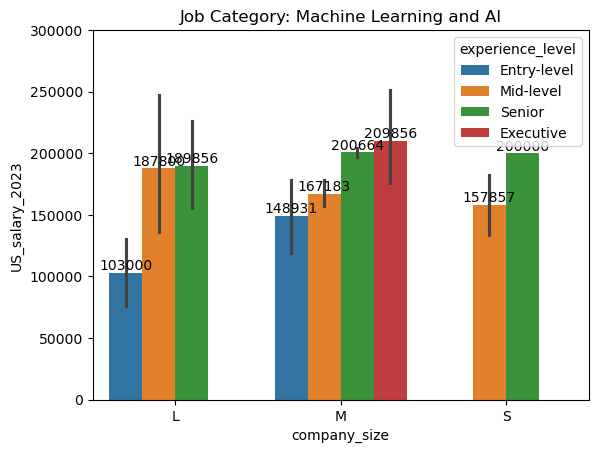

In [12]:
# Plot company_size experince_level vs salary per job_category
ax = sns.barplot(data = jobs_in_data_us_sorted.loc[jobs_in_data_us_sorted['job_category'] == 'Machine Learning and AI'], 
x='company_size', y='US_salary_2023', hue='experience_level', hue_order=experience_level_categories )
# add values to the bars
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.set_ylim(0, 300000)
ax.set(title = "Job Category: Machine Learning and AI")
plt.show()

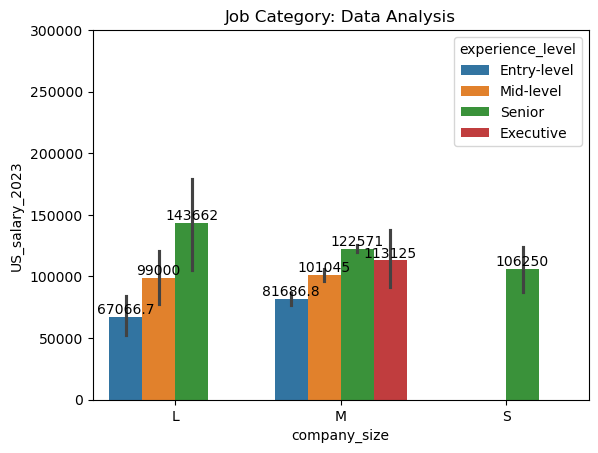

In [13]:
# Plot company_size experince_level vs salary per job_category
ax = sns.barplot(data = jobs_in_data_us_sorted.loc[jobs_in_data_us_sorted['job_category'] == 'Data Analysis'], 
x='company_size', y='US_salary_2023', hue='experience_level', hue_order=experience_level_categories )
# add values to the bars
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.set_ylim(0, 300000)
ax.set(title = "Job Category: Data Analysis")
plt.show()

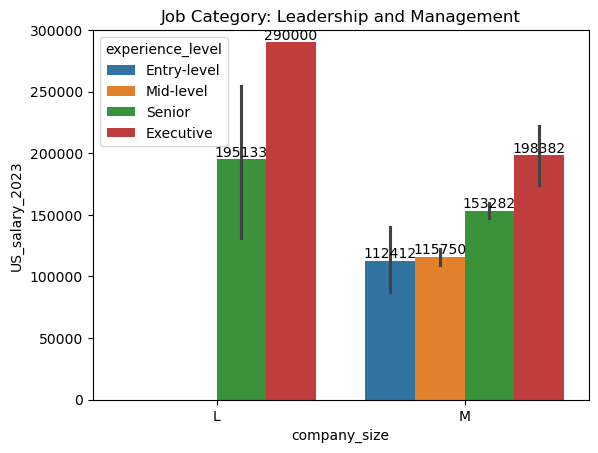

In [14]:
# Plot company_size experince_level vs salary per job_category
ax = sns.barplot(data = jobs_in_data_us_sorted.loc[jobs_in_data_us_sorted['job_category'] == 'Leadership and Management'], 
x='company_size', y='US_salary_2023', hue='experience_level', hue_order=experience_level_categories )
# add values to the bars
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.set_ylim(0, 300000)
ax.set(title = "Job Category: Leadership and Management")
plt.show()

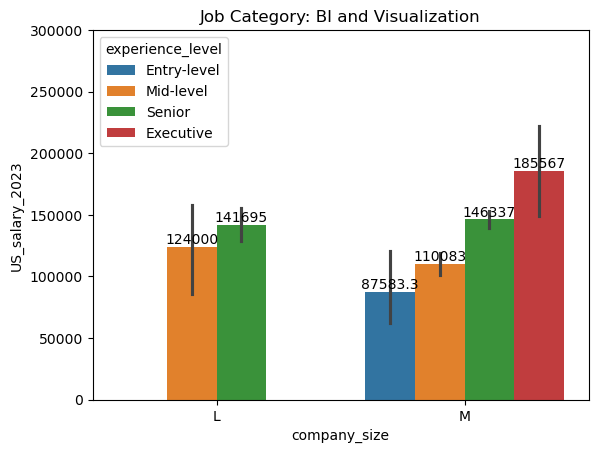

In [15]:
# Plot company_size experince_level vs salary per job_category
ax = sns.barplot(data = jobs_in_data_us_sorted.loc[jobs_in_data_us_sorted['job_category'] == 'BI and Visualization'], 
x='company_size', y='US_salary_2023', hue='experience_level', hue_order=experience_level_categories )
# add values to the bars
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.set_ylim(0, 300000)
ax.set(title = "Job Category: BI and Visualization")
plt.show()

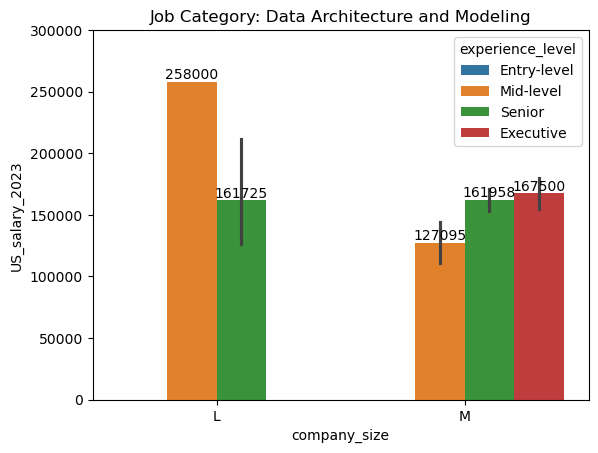

In [16]:
# Plot company_size experince_level vs salary per job_category
ax = sns.barplot(data = jobs_in_data_us_sorted.loc[jobs_in_data_us_sorted['job_category'] == 'Data Architecture and Modeling'], 
x='company_size', y='US_salary_2023', hue='experience_level', hue_order=experience_level_categories )
# add values to the bars
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.set_ylim(0, 300000)
ax.set(title = "Job Category: Data Architecture and Modeling")
plt.show()

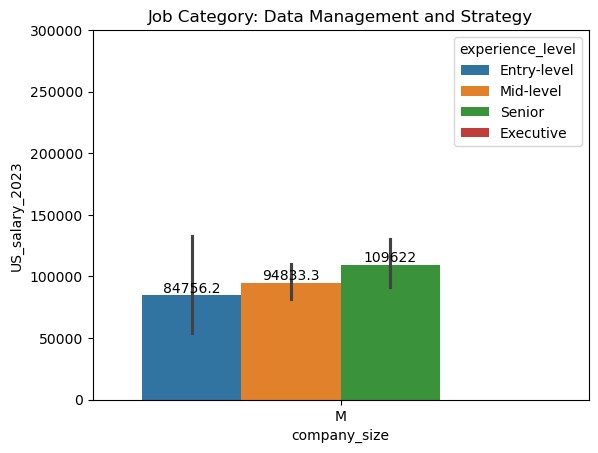

In [17]:
# Plot company_size experince_level vs salary per job_category
ax = sns.barplot(data = jobs_in_data_us_sorted.loc[jobs_in_data_us_sorted['job_category'] == 'Data Management and Strategy'], 
x='company_size', y='US_salary_2023', hue='experience_level', hue_order=experience_level_categories )
# add values to the bars
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.set_ylim(0, 300000)
ax.set(title = "Job Category: Data Management and Strategy")
plt.show()

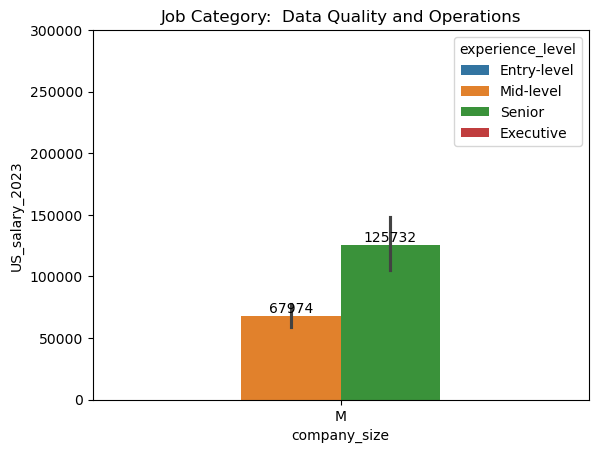

In [18]:
# Plot company_size experince_level vs salary per job_category
ax = sns.barplot(data = jobs_in_data_us_sorted.loc[jobs_in_data_us_sorted['job_category'] == 'Data Quality and Operations'], 
x='company_size', y='US_salary_2023', hue='experience_level', hue_order=experience_level_categories )
# add values to the bars
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.set_ylim(0, 300000)
ax.set(title = "Job Category:  Data Quality and Operations")
plt.show()

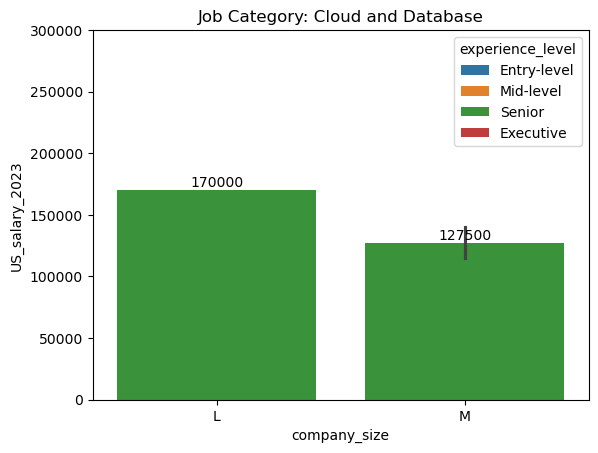

In [19]:
# Plot company_size experince_level vs salary per job_category
ax = sns.barplot(data = jobs_in_data_us_sorted.loc[jobs_in_data_us_sorted['job_category'] == 'Cloud and Database'], 
x='company_size', y='US_salary_2023', hue='experience_level', hue_order=experience_level_categories )
# add values to the bars
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.set_ylim(0, 300000)
ax.set(title = "Job Category: Cloud and Database")
plt.show()

**Conclusion:** There is a noticeable difference in pay  between the job categories  and some difference in pay for company size. ​

### Plot job_category and experince_level vs salary per company_size

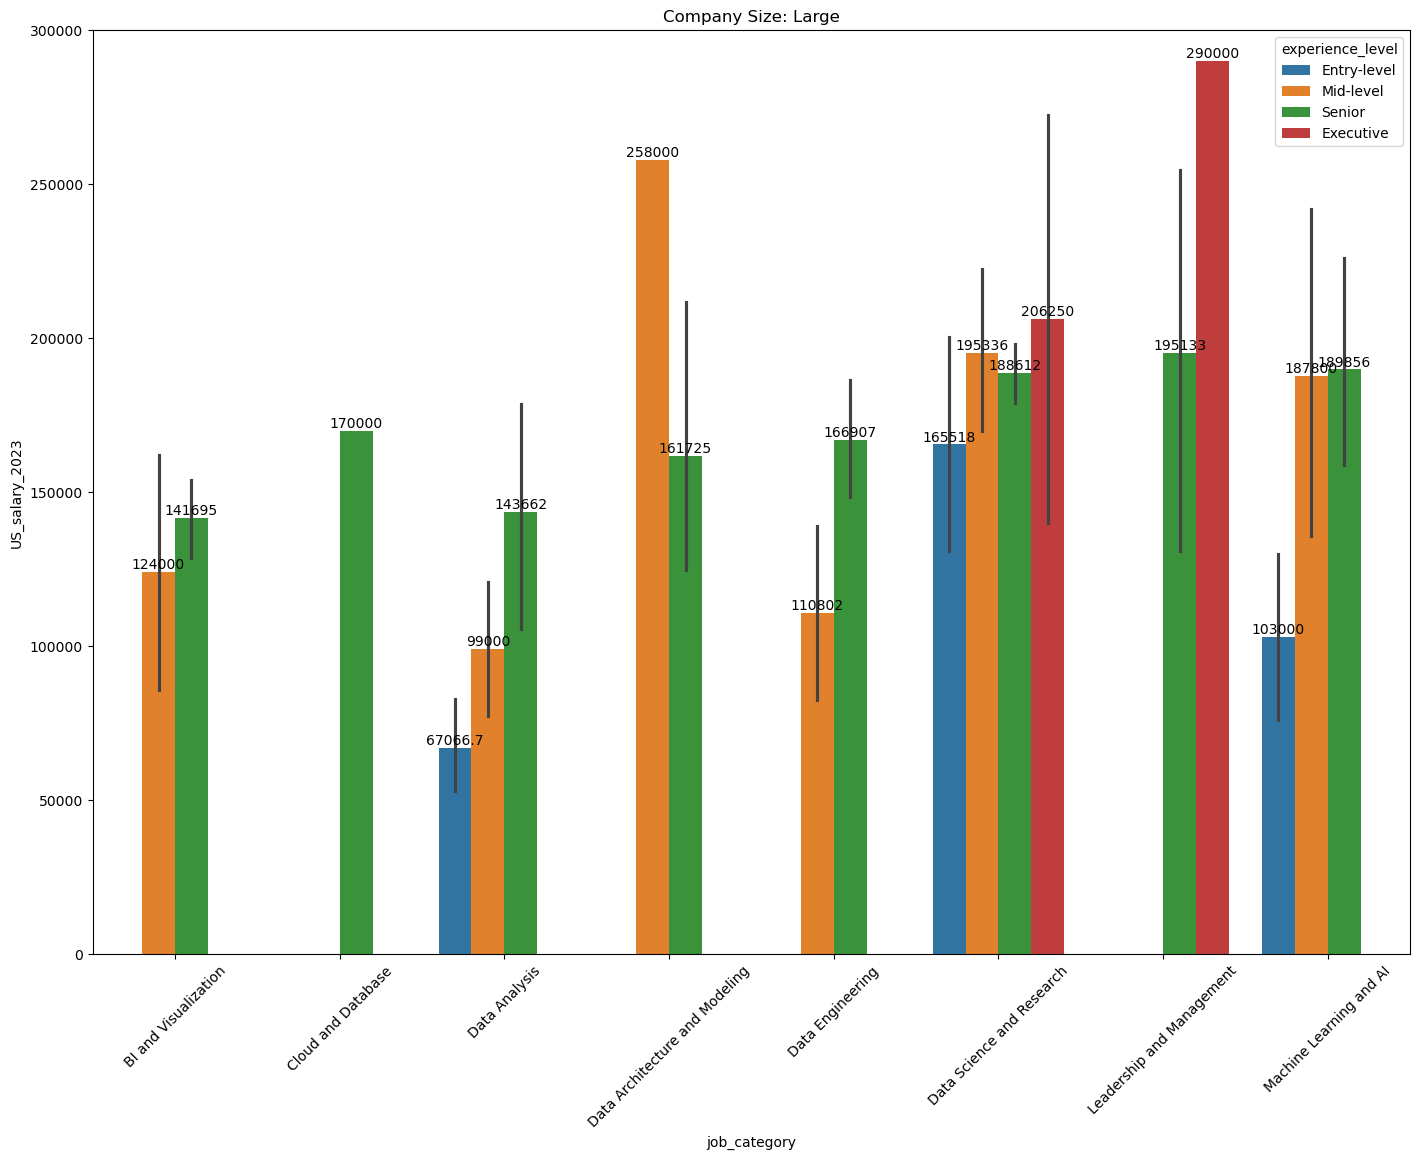

In [20]:
# Plot job_category and experince_level vs salary per company_size
fig, ax = plt.subplots(figsize=(17, 12))
ax = sns.barplot(data = jobs_in_data_us_sorted.loc[jobs_in_data_us_sorted['company_size'] == 'L'], 
x='job_category', y='US_salary_2023', hue='experience_level', hue_order=experience_level_categories )
# add values to the bars
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.set_ylim(0, 300000)
ax.set(title = "Company Size: Large")
plt.xticks(rotation=45)
plt.show()

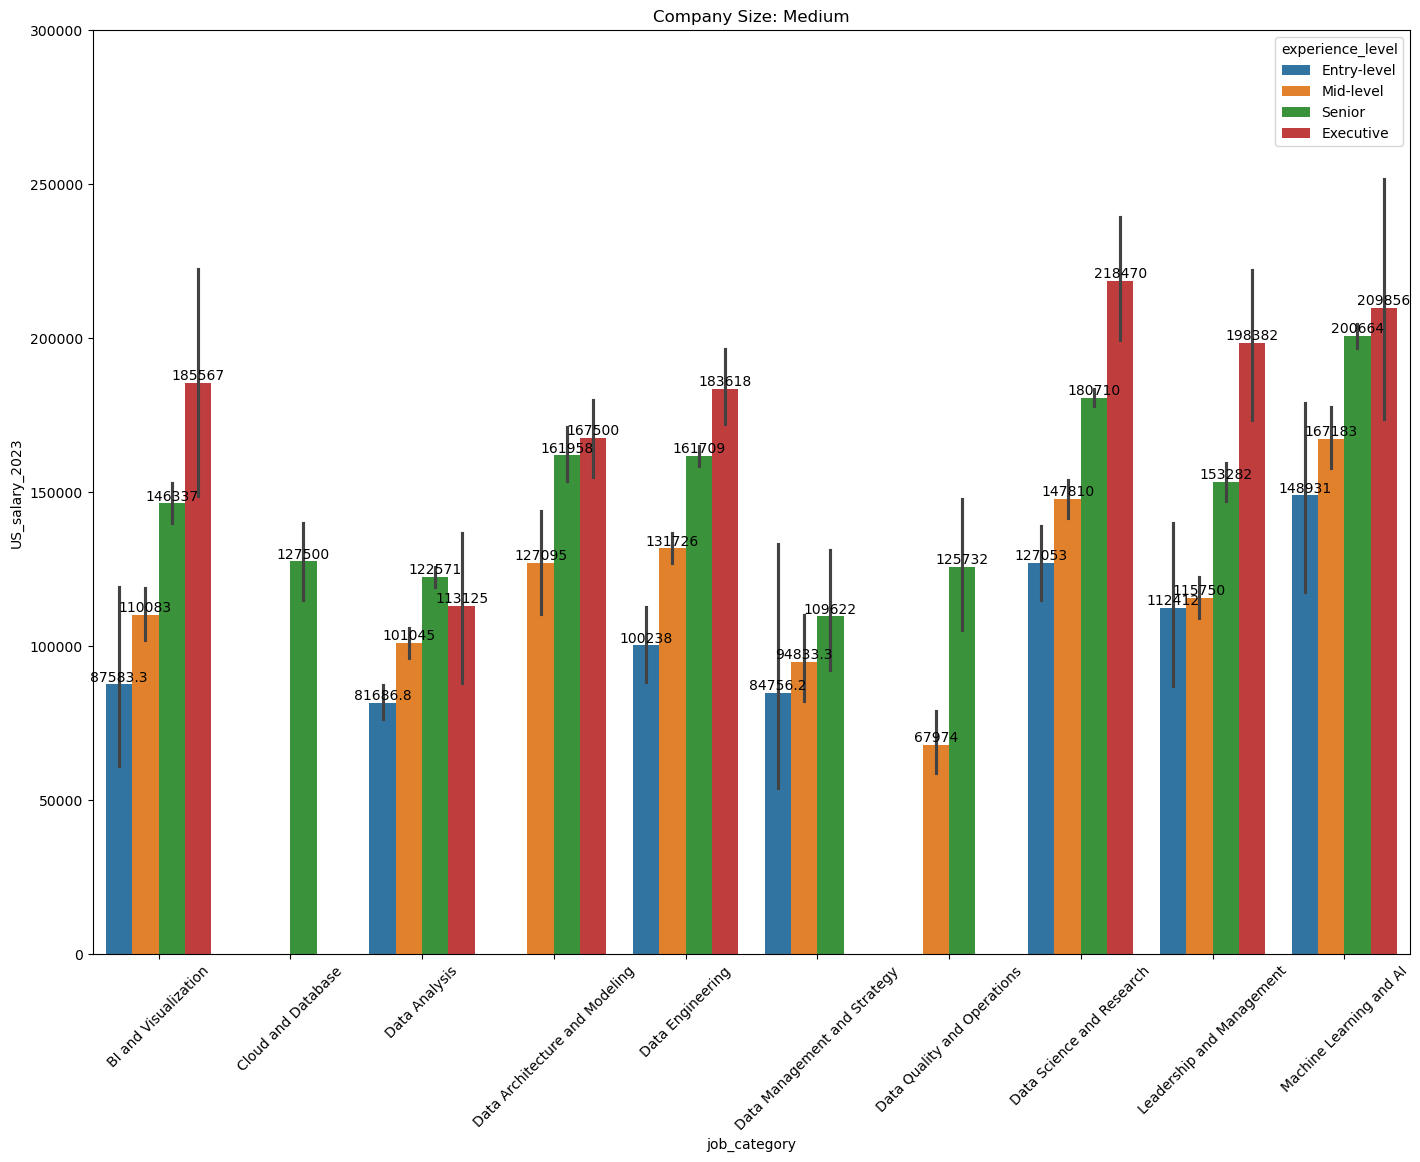

In [21]:
# Plot job_category and experince_level vs salary per company_size
fig, ax = plt.subplots(figsize=(17, 12))
ax = sns.barplot(data = jobs_in_data_us_sorted.loc[jobs_in_data_us_sorted['company_size'] == 'M'], 
x='job_category', y='US_salary_2023', hue='experience_level', hue_order=experience_level_categories )
# add values to the bars
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.set_ylim(0, 300000)
ax.set(title = "Company Size: Medium")
plt.xticks(rotation=45)
plt.show()

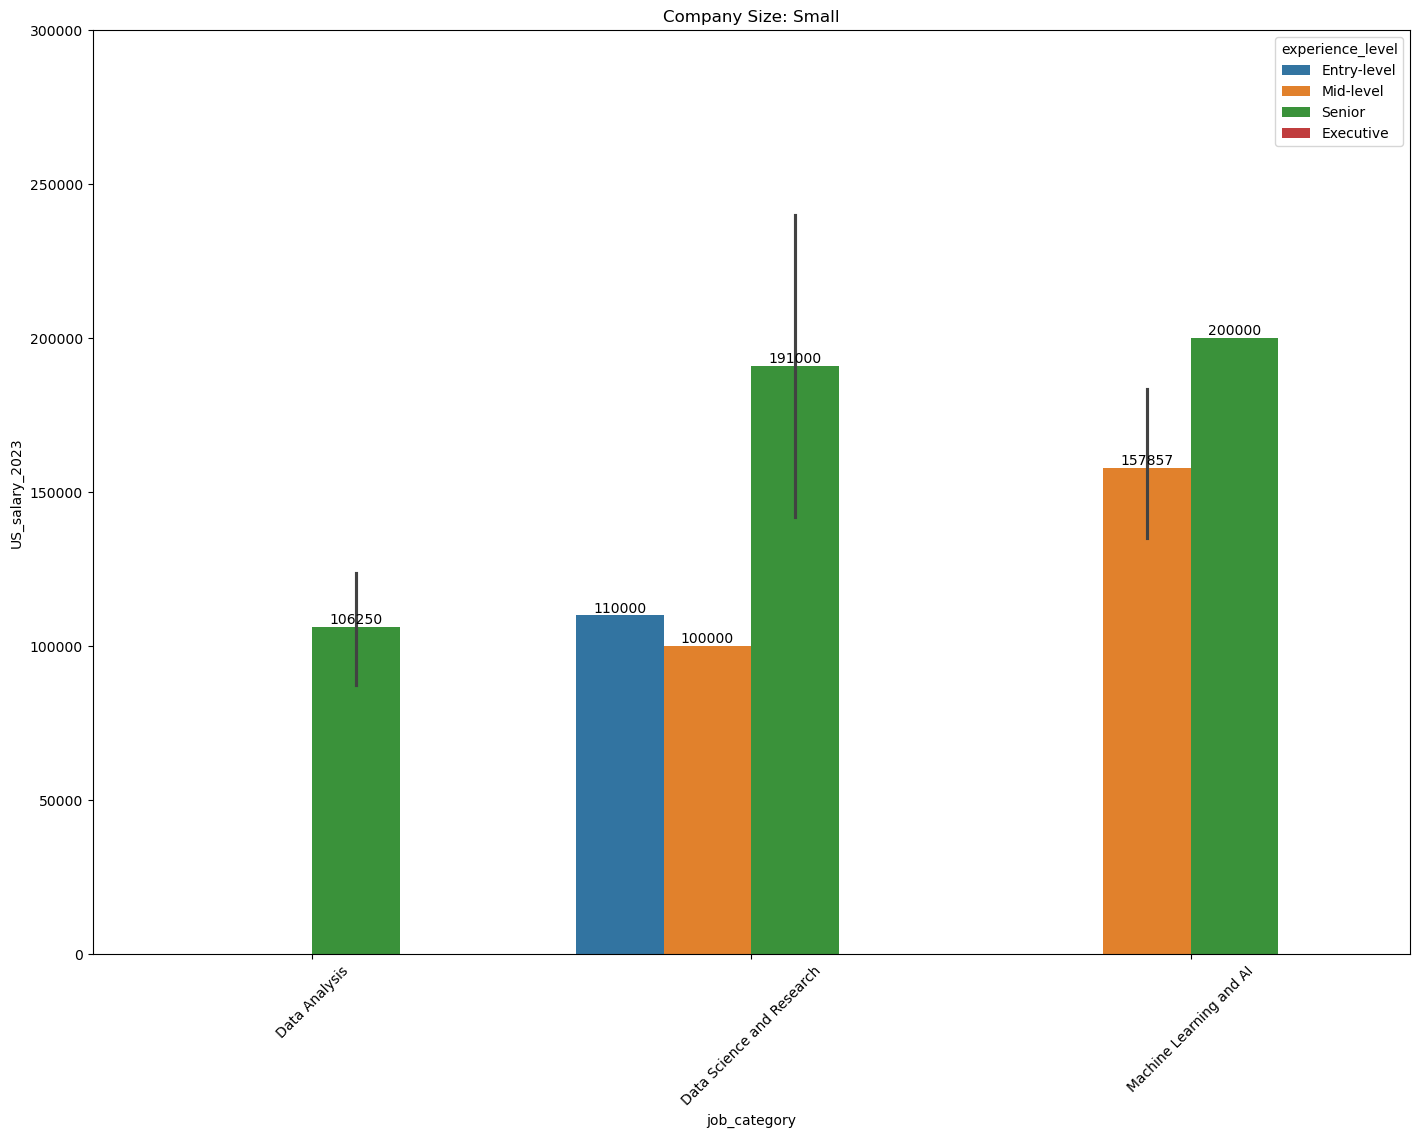

In [22]:
# Plot job_category and experince_level vs salary per company_size
fig, ax = plt.subplots(figsize=(17, 12))
ax = sns.barplot(data = jobs_in_data_us_sorted.loc[jobs_in_data_us_sorted['company_size'] == 'S'], 
x='job_category', y='US_salary_2023', hue='experience_level', hue_order=experience_level_categories )
# add values to the bars
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.set_ylim(0, 300000)
ax.set(title = "Company Size: Small")
plt.xticks(rotation=45)
plt.show()

**Conclusion:** Tops 3 highest paying job categories:  Machine Learning and AI, Leadership and Management & ​

Data Science and Research base on data for medium company size. 

### Plot job_category , experince_level, work_setting vs salary per medium company_size

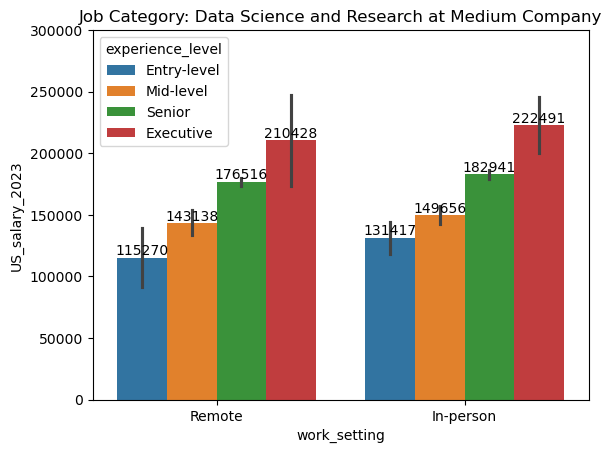

In [23]:
# Plot company_size experince_level vs job_category for medium company_size
ax = sns.barplot(data = jobs_in_data_us_sorted.loc[(jobs_in_data_us_sorted['job_category'] == 'Data Science and Research') & (jobs_in_data_us_sorted['company_size'] == 'M')], 
x='work_setting', y='US_salary_2023', hue='experience_level', hue_order=experience_level_categories )
# add values to the bars
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.set_ylim(0, 300000)
ax.set(title = "Job Category: Data Science and Research at Medium Company")
plt.show()

### Plot company_size experince_level vs job_category for medium company_size

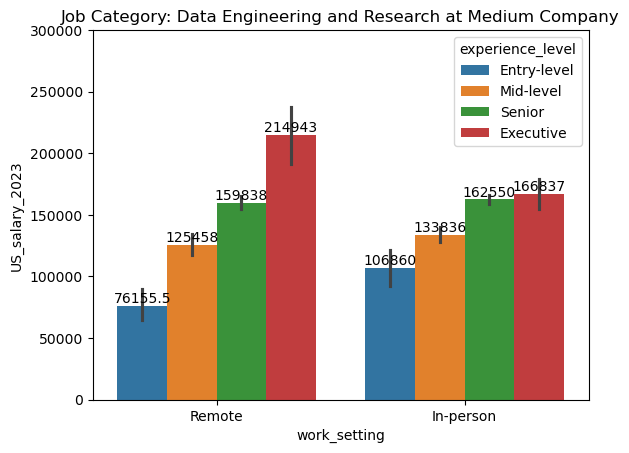

In [24]:
# Plot company_size experince_level vs job_category for medium company_size
ax = sns.barplot(data = jobs_in_data_us_sorted.loc[(jobs_in_data_us_sorted['job_category'] == 'Data Engineering') & (jobs_in_data_us_sorted['company_size'] == 'M')], 
x='work_setting', y='US_salary_2023', hue='experience_level', hue_order=experience_level_categories )
# add values to the bars
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.set_ylim(0, 300000)
ax.set(title = "Job Category: Data Engineering and Research at Medium Company")
plt.show()

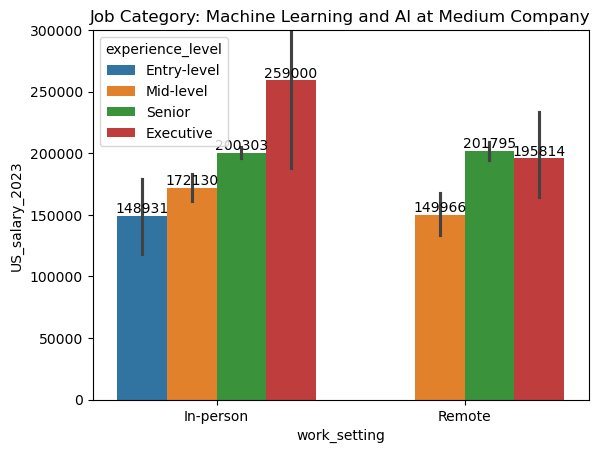

In [25]:
# Plot company_size experince_level vs job_category for medium company_size
ax = sns.barplot(data = jobs_in_data_us_sorted.loc[(jobs_in_data_us_sorted['job_category'] == 'Machine Learning and AI') & (jobs_in_data_us_sorted['company_size'] == 'M')], 
x='work_setting', y='US_salary_2023', hue='experience_level', hue_order=experience_level_categories )
# add values to the bars
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.set_ylim(0, 300000)
ax.set(title = "Job Category: Machine Learning and AI at Medium Company")
plt.show()

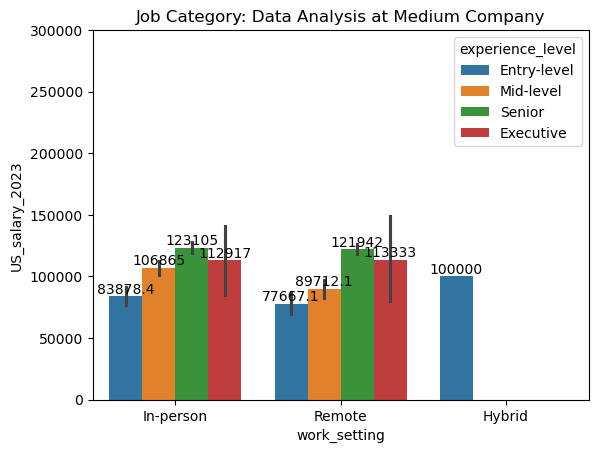

In [26]:
# Plot company_size experince_level vs job_category for medium company_size
ax = sns.barplot(data = jobs_in_data_us_sorted.loc[(jobs_in_data_us_sorted['job_category'] == 'Data Analysis') & (jobs_in_data_us_sorted['company_size'] == 'M')], 
x='work_setting', y='US_salary_2023', hue='experience_level', hue_order=experience_level_categories )
# add values to the bars
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.set_ylim(0, 300000)
ax.set(title = "Job Category: Data Analysis at Medium Company")
plt.show()

**Conclusion:** In general in-person positions pay more than remote positions. 